In [7]:
import numpy as np
import matplotlib.pyplot as plt
from util import *

In [8]:
N = 50
mx1 = 1
my1 = 1
mx2 = 10
my2 = 10
vx1 = 2
vy1 = 2
vx2 = 2
vy2 = 2

In [9]:
def plot(C0,C1,title):
    plt.figure()
    plt.plot(C0[:, 0],C0[:, 1],'ro')
    plt.plot(C1[:, 0],C1[:, 1],'bo')
    plt.title(title)
    plt.show()

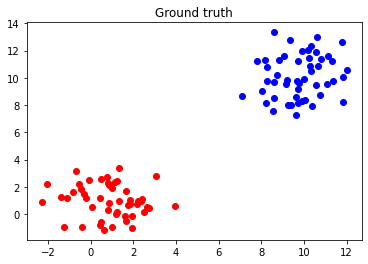

[[ 4.15883647e-01 -7.81373427e-01  1.00000000e+00]
 [-8.53715117e-01  1.64826975e+00  1.00000000e+00]
 [ 2.40021720e+00  1.10410665e+00  1.00000000e+00]
 [ 9.67814645e-01  2.03117489e+00  1.00000000e+00]
 [ 1.92852858e+00 -1.20949019e-01  1.00000000e+00]
 [ 6.07097338e-01 -1.17091743e+00  1.00000000e+00]
 [ 1.65044545e+00  1.71136054e+00  1.00000000e+00]
 [ 1.93388884e+00 -1.03669409e+00  1.00000000e+00]
 [-4.68368472e-01  1.85936858e+00  1.00000000e+00]
 [ 2.23903150e+00  9.80723854e-01  1.00000000e+00]
 [ 4.52469728e-01  1.18026796e+00  1.00000000e+00]
 [ 8.25111162e-01  3.06221598e-01  1.00000000e+00]
 [-6.98363773e-01  3.15762985e+00  1.00000000e+00]
 [ 9.75442745e-01 -9.69336870e-01  1.00000000e+00]
 [ 1.85002989e+00  1.06250204e+00  1.00000000e+00]
 [ 1.13356561e+00  2.31796660e+00  1.00000000e+00]
 [-2.27857721e+00  8.51327554e-01  1.00000000e+00]
 [-2.06480900e+00  2.18715878e+00  1.00000000e+00]
 [ 2.16407688e+00  7.57254863e-01  1.00000000e+00]
 [ 2.74138875e+00  4.63943144e-

In [10]:
D1 = np.empty((N,2))
D2 = np.empty((N,2))
for i in range(N):
    x = gaussian_data_generator(mx1, vx1)
    y = gaussian_data_generator(my1, vy1)
    D1[i, 0] = x
    D1[i, 1] = y
    x = gaussian_data_generator(mx2, vx2)
    y = gaussian_data_generator(my2, vy2)
    D2[i, 0] = x
    D2[i, 1] = y
#print(D1)
plot(D1, D2, 'Ground truth')
A = np.vstack((D1, D2))
A = np.concatenate((A, np.ones((2*N, 1))), axis=1)
b = np.zeros((2 * N, 1))
b[N:] = np.ones((N, 1))
print(A)

Gradient descent:

w:
[4.0116727]
[4.14490177]
[-29.85786111]
Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        50               0       
Is cluster 2        0               50       

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 1.0


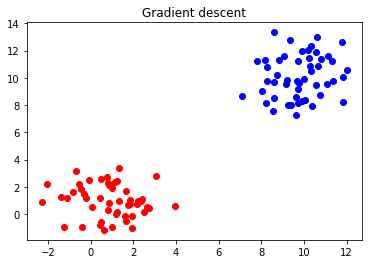

In [11]:
w = np.random.rand(3, 1)
w_gradient = run_gradient(A, w, b, lr=0.1)

#print
print('Gradient descent:\n')
b_predict = predict(A, w_gradient)
matrix, C0_predict, C1_predict = confusion_matrix(A, b, b_predict)
print('w:')
print(w_gradient[0])
print(w_gradient[1])
print(w_gradient[2])
print_confusion_matrix(matrix)
plot(C0_predict,C1_predict,'Gradient descent')




----------------------------------------
Newton's method:
w:
[6.69607212]
[10.62321751]
[-101.19915611]
Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        50               0       
Is cluster 2        0               50       

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 1.0


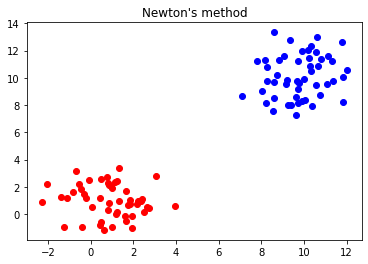

In [12]:
#newton's method
w = np.random.rand(3,1)
w_Newton = run_Newton(A, w, b, lr=0.1)

#print
print('\n----------------------------------------')
print('Newton\'s method:')
b_predict = predict(A, w_Newton)
matrix, C0_predict, C1_predict = confusion_matrix(A, b, b_predict)
print('w:')
print(w_Newton[0])
print(w_Newton[1])
print(w_Newton[2])
print_confusion_matrix(matrix)
plot(C0_predict,C1_predict,'Newton\'s method')